<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Kiparenko-Nikolai-folder/Kiparenko%20Nikolai/INSPECTRUM_CLINIC_HR_RECSYS_GR1_AUTO_ML_13.06.2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Инициализация проекта

In [1]:
!pip install h2o

import h2o

from h2o.automl import H2OAutoML
h2o.init()

!pip install autokeras
import autokeras as ak


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=986a928ba9a200e713c2b29c9f4a4de053bd5d4839907dac34901756a39b3d2c
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp_6rsbri
  JVM stdout: /tmp/tmpp

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_1yx6in
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.0 MB/s eta 0:00:00


In [2]:

# Загрузка датасетов из облака
import gdown

# Функции операционной системы
import os

# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# автоматически парсит строку и сохранит ее в переменной datetime
import datetime

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Отрисовка графиков
import matplotlib.pyplot as plt
# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
#Грузим файл
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx','dataS.xlsx', quiet=True)



'dataS.xlsx'

In [4]:
#Читаем файл
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.to_csv('data.csv')
data.head(5)

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


### Вспомогательные функции

In [5]:
def convertDataSet(data):
          #Если необходимо переименовать
          data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']
          #Разбираем Дату раждения
          Birth = data['Gender'].apply(lambda x: x.split(',')[2].strip() if len(x.split(','))>2 else '')
          data = data.assign(Birth=Birth)
          #Разбираем Возраст
          Age = data['Gender'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
          data = data.assign(Age=Age)

          #Тип образования
          DegreeOfStudy = data['Education'].apply(lambda x: x.split(',')[0].strip() if len(x.split(','))>1 else '')
          data = data.assign(DegreeOfStudy=DegreeOfStudy)
          #Год окончания образования
          YearOfGraduation = data['Education'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
          data = data.assign(YearOfGraduation=YearOfGraduation)

          #Формируем список месяцев
          month_name = {1: 'января', 2: 'февраля', 3: 'марта', 4: 'апреля', 5: 'мая', 6: 'июня',
                7: 'июля', 8: 'августа', 9: 'сентября', 10: 'октября', 11: 'ноября', 12: 'декабря'}


          for i, row in data.iterrows():
            #Gender
            row.Gender = row.Gender.split(',')[0].strip()
            #Женщина = 0, Мужчина = 1
            row.Gender = row.Gender.replace('Женщина','0')
            row.Gender = row.Gender.replace('Мужчина','1')
            row.Gender = int(row.Gender)

            #Birth
            row.Birth = row.Birth.replace('родился','')
            row.Birth = row.Birth.replace('родилась','')

            #Age
            row.Age = row.Age.replace('года','')
            row.Age = row.Age.replace('год','')
            row.Age = row.Age.replace('лет','')
            row.Age = row.Age='' if 0 else row.Age

            try:
              row.Age = int(row.Age)
            except (IndexError, TypeError, ValueError):
              print(row.Age)
              row.Age = 0

            try:
                row.YearOfGraduation = int(row.YearOfGraduation)
            except (IndexError, TypeError, ValueError):
                print(row.YearOfGraduation)
                row.YearOfGraduation = 0

            #Salary
            row.Salary = row.Salary.replace(' ','')
            row.Salary = str(float(row.Salary.replace('KGS',''))*0.89)      if row.Salary.find('KGS') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('KZT',''))*0.18)      if row.Salary.find('KZT') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('USD',''))*78.00)     if row.Salary.find('USD') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('EUR',''))*85.00)     if row.Salary.find('EUR') != -1 else row.Salary
            row.Salary = row.Salary.replace('руб.','')
            row.Salary = row.Salary.replace('руб','')
            row.Salary = row.Salary.replace('неуказана','0')
            row.Salary = int(float(row.Salary))

            #Experience
            row.Experience = row.Experience.replace('Опыт работы —','')
            row.Experience = row.Experience.replace('Опыт работы','')
            row.Experience = row.Experience.replace('года',';')
            row.Experience = row.Experience.replace('лет',';')
            row.Experience = row.Experience.replace('годов',';')
            row.Experience = row.Experience.replace('год',';')
            row.Experience = row.Experience.replace('года',';')
            row.Experience = row.Experience.replace('месяцев','')
            row.Experience = row.Experience.replace('месяца','')
            row.Experience = row.Experience.replace('месяц','')
            row.Experience = row.Experience.replace('нет','0')
            #Приводим к месяцам, если были года умножаем на 12 иначе берем как есть
            row.Experience = (int(row.Experience.split(';')[0].strip()) * 12 + (int(row.Experience.split(';')[1].strip())) if row.Experience.split(';')[1].strip() != '' else int(row.Experience.split(';')[0].strip()) * 12) if len(row.Experience.split(';')) >1 else int(row.Experience.strip())

            #Schedule
            #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
            row.Schedule = row.Schedule.replace('вахтовый метод','0')
            row.Schedule = row.Schedule.replace('удаленная работа','1')
            row.Schedule = row.Schedule.replace('гибкий график','2')
            row.Schedule = row.Schedule.replace('полный день','3')
            row.Schedule = row.Schedule.replace('сменный график','4')

            #Employment
            #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
            row.Employment = row.Employment.replace('проектная работа','0')
            row.Employment = row.Employment.replace('неполный рабочий день','1')
            row.Employment = row.Employment.replace('полный рабочий день','2')
            row.Employment = row.Employment.replace('полная занятость','3')
            row.Employment = row.Employment.replace('частичная занятость','4')
            row.Employment = row.Employment.replace('стажировка','5')
            row.Employment = row.Employment.replace('волонтерство','6')

            #Birth
            for i in month_name:
              row.Birth         = row.Birth.replace(month_name[i],'-'+str(i)+'-')

            row.Birth         = row.Birth.replace('родился','')
            row.Birth         = row.Birth.replace('родилась','')
            row.Birth         = row.Birth.replace(' -','-')
            row.Birth         = row.Birth.replace('- ','-')
            row.Birth         = row.Birth+' 00:00:00'

            row.Birth = '1-1-1' +row.Birth if row.Birth == ' 00:00:00' else row.Birth
            day = int(row.Birth.split('-')[0].strip())
            month = int(row.Birth.split('-')[1].strip())
            year = row.Birth.split('-')[2].strip()
            time = year.split(' ')[1].strip()
            year = int(year.split(' ')[0].strip())

            row.Birth = int(datetime.datetime(year,month,day).utcnow().timestamp())

            #Update_resume
            for i in month_name:
              row.Update_resume = row.Update_resume.replace(month_name[i],'-'+str(i)+'-')

            row.Update_resume = row.Update_resume.replace('в','')
            row.Update_resume = row.Update_resume.replace(' -','-')
            row.Update_resume = row.Update_resume.replace('- ','-')
            row.Update_resume = row.Update_resume+':00'

            day = int(row.Update_resume.split('-')[0].strip())
            month = int(row.Update_resume.split('-')[1].strip())
            year = row.Update_resume.split('-')[2].strip()
            year = year.replace('  ',';')
            year = year.replace(' ',';')

            time = year.split(';')[1].strip()
            year = int(year.split(';')[0].strip())
            hour = int(time.split(':')[0].strip())
            minute = int(time.split(':')[1].strip())

            row.Update_resume = int(datetime.datetime(year,month,day,hour,minute,0).utcnow().timestamp())

            #Response_date
            row.Response_date = int(datetime.datetime.utcnow().timestamp())

          #Переведем в бинарные значения

          #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
          Employment_0 = data['Employment'].apply(lambda x: 1 if x.find('0') else 0)
          Employment_1 = data['Employment'].apply(lambda x: 1 if x.find('1') else 0)
          Employment_2 = data['Employment'].apply(lambda x: 1 if x.find('2') else 0)
          Employment_3 = data['Employment'].apply(lambda x: 1 if x.find('3') else 0)
          Employment_4 = data['Employment'].apply(lambda x: 1 if x.find('4') else 0)
          Employment_5 = data['Employment'].apply(lambda x: 1 if x.find('5') else 0)
          Employment_6 = data['Employment'].apply(lambda x: 1 if x.find('6') else 0)

          data = data.assign(Employment_0=Employment_0,
                              Employment_1=Employment_1,
                              Employment_2=Employment_2,
                              Employment_3=Employment_3,
                              Employment_4=Employment_4,
                              Employment_5=Employment_5,
                              Employment_6=Employment_6)

          #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
          Schedule_0 = data['Schedule'].apply(lambda x: 1 if x.find('0') else 0)
          Schedule_1 = data['Schedule'].apply(lambda x: 1 if x.find('1') else 0)
          Schedule_2 = data['Schedule'].apply(lambda x: 1 if x.find('2') else 0)
          Schedule_3 = data['Schedule'].apply(lambda x: 1 if x.find('3') else 0)
          Schedule_4 = data['Schedule'].apply(lambda x: 1 if x.find('4') else 0)

          data = data.assign(Schedule_0=Schedule_0,
                              Schedule_1=Schedule_1,
                              Schedule_2=Schedule_2,
                              Schedule_3=Schedule_3,
                              Schedule_4=Schedule_4)

          data = data.drop(columns=['Schedule', 'Employment'])


          #City
          tokenizer = Tokenizer(num_words=30, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.City) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
          City_Indexes = tokenizer.texts_to_sequences(data.City)
          data = data.assign(City=City_Indexes)

          #Full_name
          tokenizer = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Full_name)

          Full_name_Indexes = tokenizer.texts_to_sequences(data.Full_name)
          data = data.assign(Full_name=Full_name_Indexes)

          #Education
          tokenizer = Tokenizer(num_words=200, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Education) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Education_Indexes = tokenizer.texts_to_sequences(data.Education)
          data = data.assign(Education=Education_Indexes)

          #DegreeOfStudy
          tokenizer = Tokenizer(num_words=20, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.DegreeOfStudy) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          DegreeOfStudy_Indexes = tokenizer.texts_to_sequences(data.DegreeOfStudy)
          data = data.assign(DegreeOfStudy=DegreeOfStudy_Indexes)

          #Job
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Job) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Job_Indexes = tokenizer.texts_to_sequences(data.Job)
          data = data.assign(Job=Job_Indexes)


          #Last_place
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Last_place) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Last_place_Indexes = tokenizer.texts_to_sequences(data.Last_place)
          data = data.assign(Last_place=Last_place_Indexes)

          #Position
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Position) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Position_Indexes = tokenizer.texts_to_sequences(data.Position)
          data = data.assign(Position=Position_Indexes)

          #Приведим все списки к однообразию
          data.Response_date = data.Response_date.astype('int')
          data.Gender = data.Gender.astype('int')
          data.Salary = data.Salary.astype('int')
          data.Update_resume = data.Update_resume.astype('int')
          data.Birth = data.Birth.astype('int')
          data.Age = data.Age.astype('int')
          data.YearOfGraduation = data.YearOfGraduation.astype('int')

          #Находим максимальную длину
          Full_nameMaxI = 0
          PositionMaxI = 0
          Last_placeMaxI = 0
          JobMaxI = 0
          EducationMaxI = 0
          CityMaxI = 0
          DegreeOfStudyMaxI = 0
          for i, row in data.iterrows():
              Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
              PositionMaxI    = max(PositionMaxI,len(row.Position))
              Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
              JobMaxI         = max(JobMaxI,len(row.Job))
              EducationMaxI   = max(EducationMaxI,len(row.Education))
              CityMaxI        = max(CityMaxI,len(row.City))
              DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))


          #обрабатываем данные list
          dataList = []
          for i, row in data.iterrows():
                row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
                row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
                row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
                row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
                row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
                row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
                row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])

                #row_data = np.hstack(row)
                row_data = np.hstack([
                                      row.Full_name,
                                      row.Position,
                                      row.Last_place,
                                      row.Job,
                                      row.Education,
                                      row.City,
                                      row.Response_date,
                                      row.Gender,
                                      row.Salary,
                                      row.Update_resume,
                                      row.Birth,
                                      row.Age,
                                      row.YearOfGraduation,
                                      row.DegreeOfStudy,
                                      row.Employment_0,
                                      row.Employment_1,
                                      row.Employment_2,
                                      row.Employment_3,
                                      row.Employment_4,
                                      row.Employment_5,
                                      row.Employment_6,
                                      row.Schedule_0,
                                      row.Schedule_1,
                                      row.Schedule_2,
                                      row.Schedule_3,
                                      row.Schedule_4]
                                    )

                dataList.append(row_data)

          dataset = np.array(dataList) #, dtype=np.float

          return data


In [6]:
def takeDataSet(data):
          data = convertDataSet(data)

          #Находим максимальную длину
          Full_nameMaxI = 0
          PositionMaxI = 0
          Last_placeMaxI = 0
          JobMaxI = 0
          EducationMaxI = 0
          CityMaxI = 0
          DegreeOfStudyMaxI = 0
          for i, row in data.iterrows():
              Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
              PositionMaxI    = max(PositionMaxI,len(row.Position))
              Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
              JobMaxI         = max(JobMaxI,len(row.Job))
              EducationMaxI   = max(EducationMaxI,len(row.Education))
              CityMaxI        = max(CityMaxI,len(row.City))
              DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))


          #обрабатываем данные list
          dataList = []
          for i, row in data.iterrows():
                row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
                row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
                row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
                row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
                row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
                row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
                row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])

                #row_data = np.hstack(row)
                row_data = np.hstack([
                                      row.Full_name,
                                      row.Position,
                                      row.Last_place,
                                      row.Job,
                                      row.Education,
                                      row.City,
                                      row.Response_date,
                                      row.Gender,
                                      row.Salary,
                                      row.Update_resume,
                                      row.Birth,
                                      row.Age,
                                      row.YearOfGraduation,
                                      row.DegreeOfStudy,
                                      row.Employment_0,
                                      row.Employment_1,
                                      row.Employment_2,
                                      row.Employment_3,
                                      row.Employment_4,
                                      row.Employment_5,
                                      row.Employment_6,
                                      row.Schedule_0,
                                      row.Schedule_1,
                                      row.Schedule_2,
                                      row.Schedule_3,
                                      row.Schedule_4]
                                    )

                dataList.append(row_data)

          dataset = np.array(dataList)

          return dataset


##      **H2O**



### Без предварительной обработки

In [7]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.to_csv('data.csv')
df = h2o.import_file("data.csv",header =1)
df = df[:,1:]

df.describe ()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:579
Cols:14

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
type,time,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum
mins,44603000.0,,,,,,,,,,,,,
mean,1672892871631.4878,,,,,,,,,,,,,
maxs,1679788800000.0,,,,,,,,,,,,,
sigma,69730799683.12486,,,,,,,,,,,,,
zeros,0,,,,,,,,,,,,,
missing,1,0,0,0,0,0,0,0,0,0,0,0,0,79
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к командировкам","проектная работа, частичная занятость, полная занятость",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Российской академии образования, Москва",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский художественно-промышленный институт, Москва",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, готов к командировкам","проектная работа, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государственный университет промышленных технологий и дизайна, Санкт-Петербург",28 февраля 2023 в 09:41,да


In [8]:
train, test, valid = df.split_frame ( ratios = [ .6 , .20 ])

y = "Подходит - да/нет"
x_train= train.columns
x_train.remove(y)


In [9]:
aml_1 = H2OAutoML(max_models = 10, seed = 1)
hist = aml_1.train(x = x_train, y = y, training_frame = train)

AutoML progress: |
16:53:17.727: XGBoost_1_AutoML_1_20230613_165317 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_1_20230613_165317_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


████████
16:53:53.722: XGBoost_2_AutoML_1_20230613_165317 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_1_20230613_165317_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


███
16:54:02.301: XGBoost_3_AutoML_1_20230613_165317 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_AutoML_1_20230613_165317_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.



In [10]:
best_model_1 = aml_1.leader
lb = aml_1.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_1_20230613_165317,0.56949,0.12526,0.980863,0.5,0.154421,0.0238457
GLM_1_AutoML_1_20230613_165317,0.565418,0.0948151,0.982831,0.5,0.137117,0.018801
GBM_1_AutoML_1_20230613_165317,0.55266,0.114366,0.978077,0.5,0.138075,0.0190648
GBM_2_AutoML_1_20230613_165317,0.53013,0.119474,0.980601,0.5,0.14178,0.0201015
XRT_1_AutoML_1_20230613_165317,0.500271,0.396815,0.981511,0.5,0.138972,0.0193131
GBM_grid_1_AutoML_1_20230613_165317_model_1,0.487514,0.115418,0.977144,0.5,0.138076,0.0190649
DRF_1_AutoML_1_20230613_165317,0.463626,0.244747,0.980106,0.5,0.138646,0.0192227
GBM_5_AutoML_1_20230613_165317,0.43051,0.120693,0.975713,0.5,0.141955,0.0201513
GBM_3_AutoML_1_20230613_165317,0.429967,0.117399,0.975701,0.5,0.138131,0.0190801
GBM_4_AutoML_1_20230613_165317,0.429967,0.121338,0.975701,0.5,0.143049,0.020463


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XRT_1_AutoML_1_20230613_165317,0.634831,0.462467,0.978642,0.5,0.177927,0.031658,369,0.092064,DRF
GLM_1_AutoML_1_20230613_165317,0.552434,0.146087,0.961783,0.5,0.177913,0.0316531,140,0.085391,GLM
GBM_5_AutoML_1_20230613_165317,0.5,0.196705,0.967391,0.5,0.180129,0.0324464,237,0.354843,GBM
GBM_3_AutoML_1_20230613_165317,0.5,0.196705,0.967391,0.5,0.180129,0.0324464,154,0.128848,GBM
GBM_4_AutoML_1_20230613_165317,0.5,0.196705,0.967391,0.5,0.180129,0.0324464,128,0.048996,GBM
StackedEnsemble_AllModels_1_AutoML_1_20230613_165317,0.5,0.147674,0.967391,0.5,0.178118,0.031726,1091,0.130346,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230613_165317,0.5,0.147674,0.967391,0.5,0.178118,0.031726,1237,0.11206,StackedEnsemble
DRF_1_AutoML_1_20230613_165317,0.488764,0.283473,0.966675,0.5,0.180695,0.0326508,253,0.061312,DRF
DeepLearning_1_AutoML_1_20230613_165317,0.40824,0.210918,0.953103,0.5,0.216018,0.0466636,919,0.171596,DeepLearning
GBM_2_AutoML_1_20230613_165317,0.350187,0.196721,0.934105,0.5,0.180129,0.0324465,314,0.261079,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_1_20230613_165317

,да,нет,Error,Rate
да,0.0,3.0,1.0,(3.0/3.0)
нет,0.0,89.0,0.0,(0.0/89.0)
Total,0.0,92.0,0.0326,(3.0/92.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

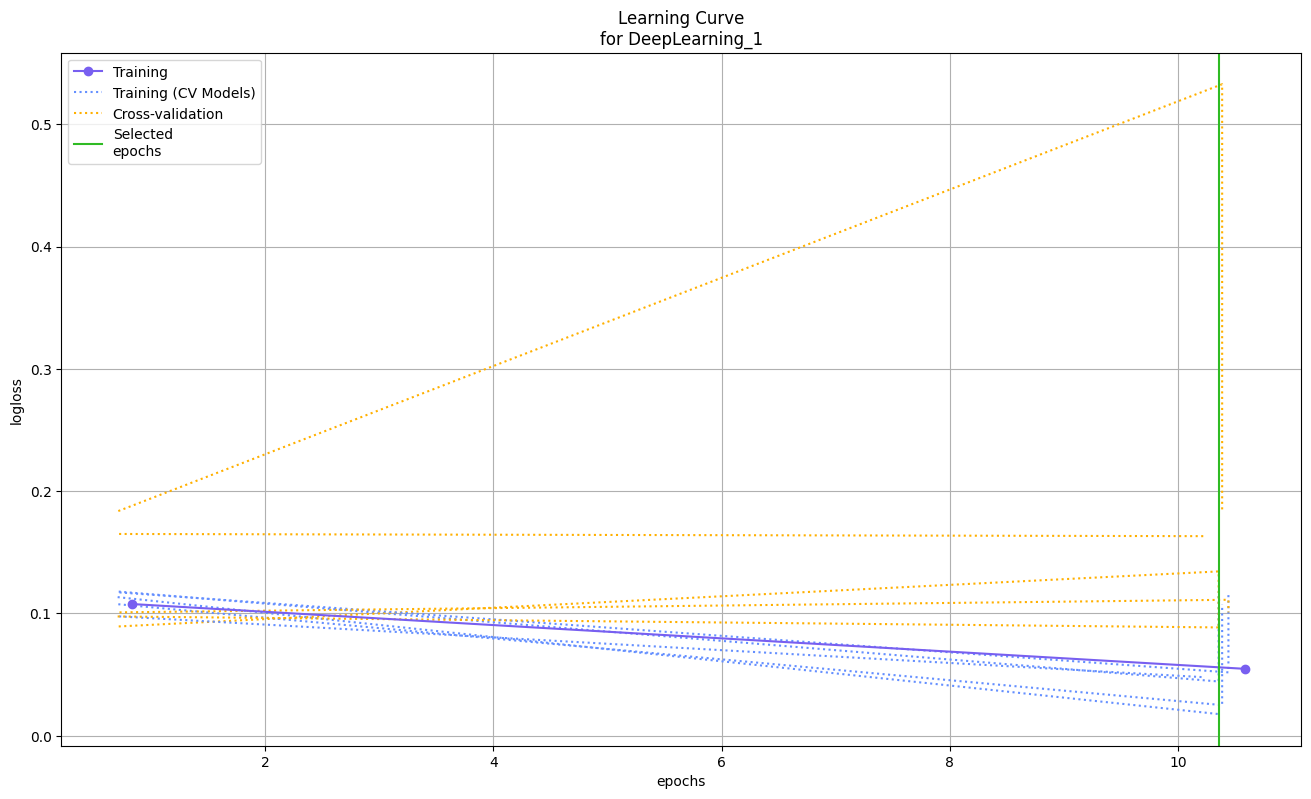

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

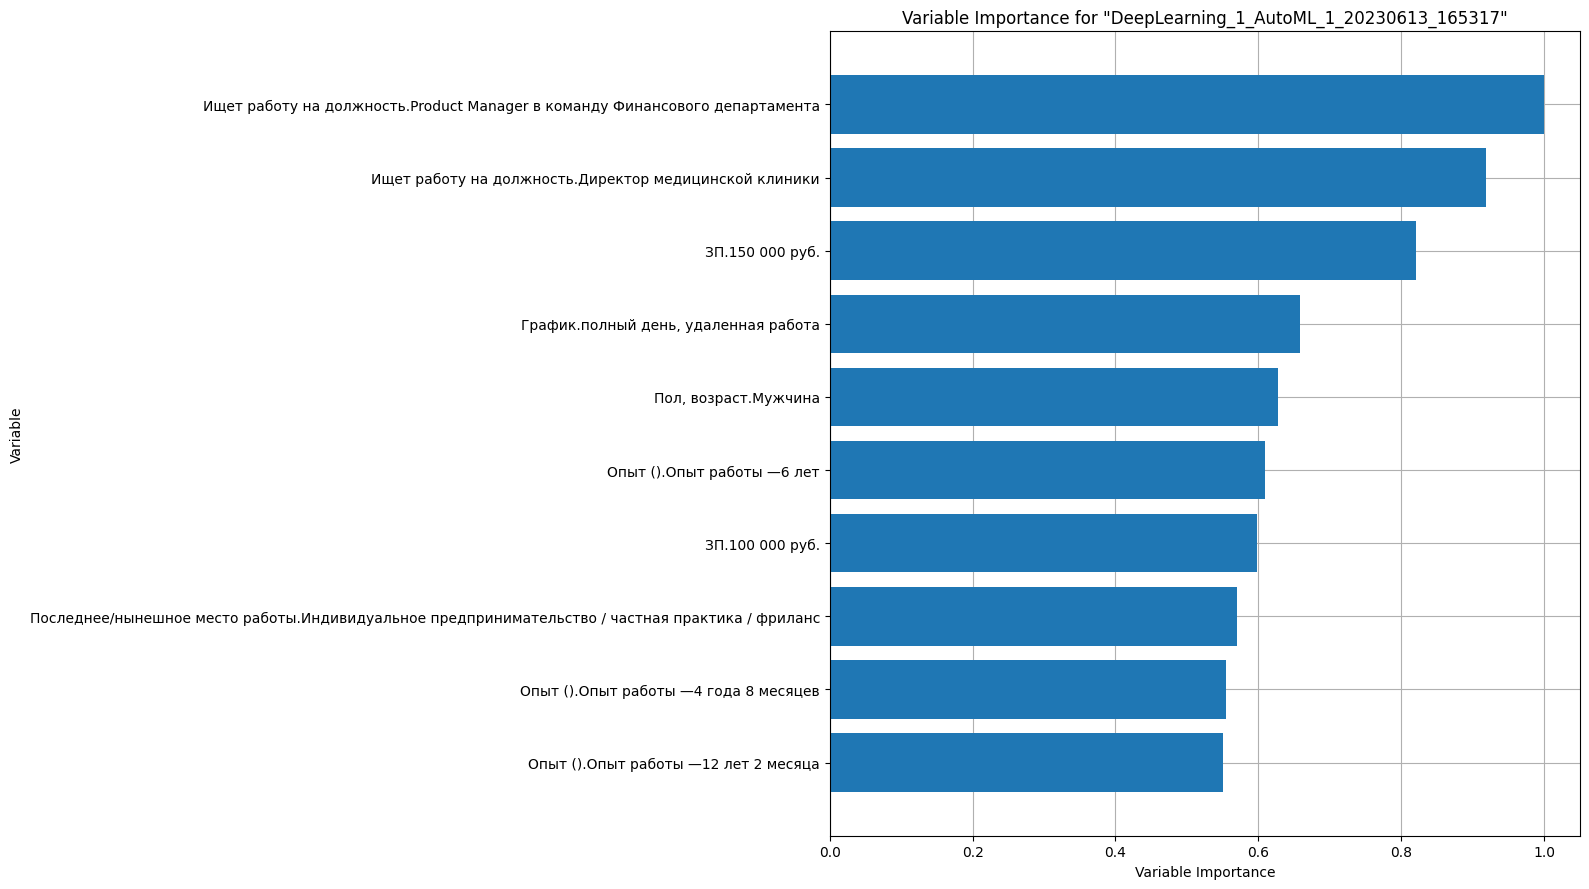

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

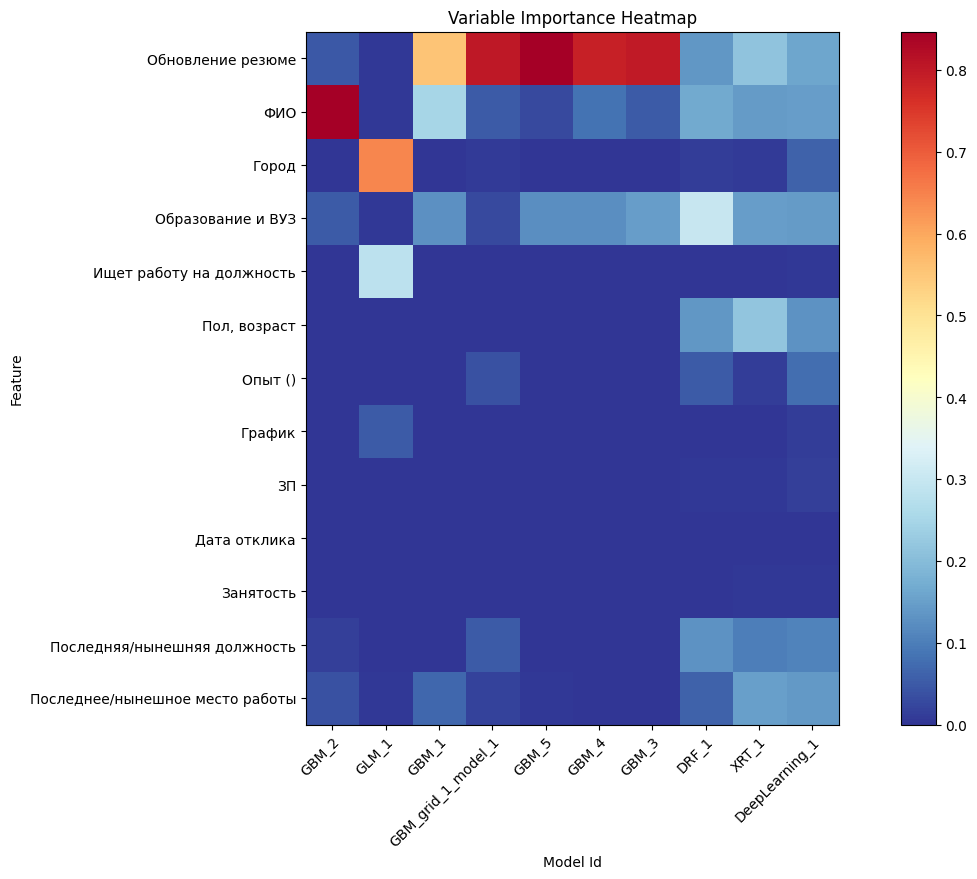

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

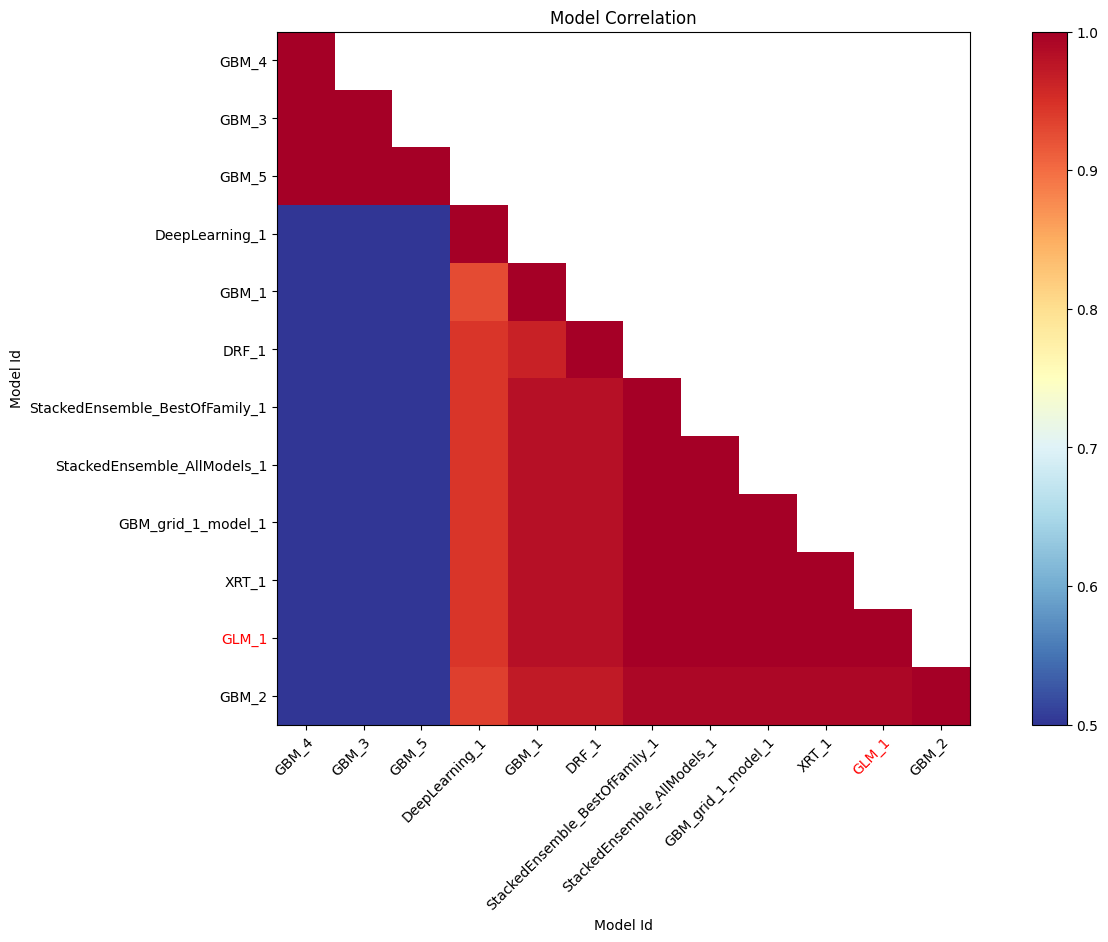

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

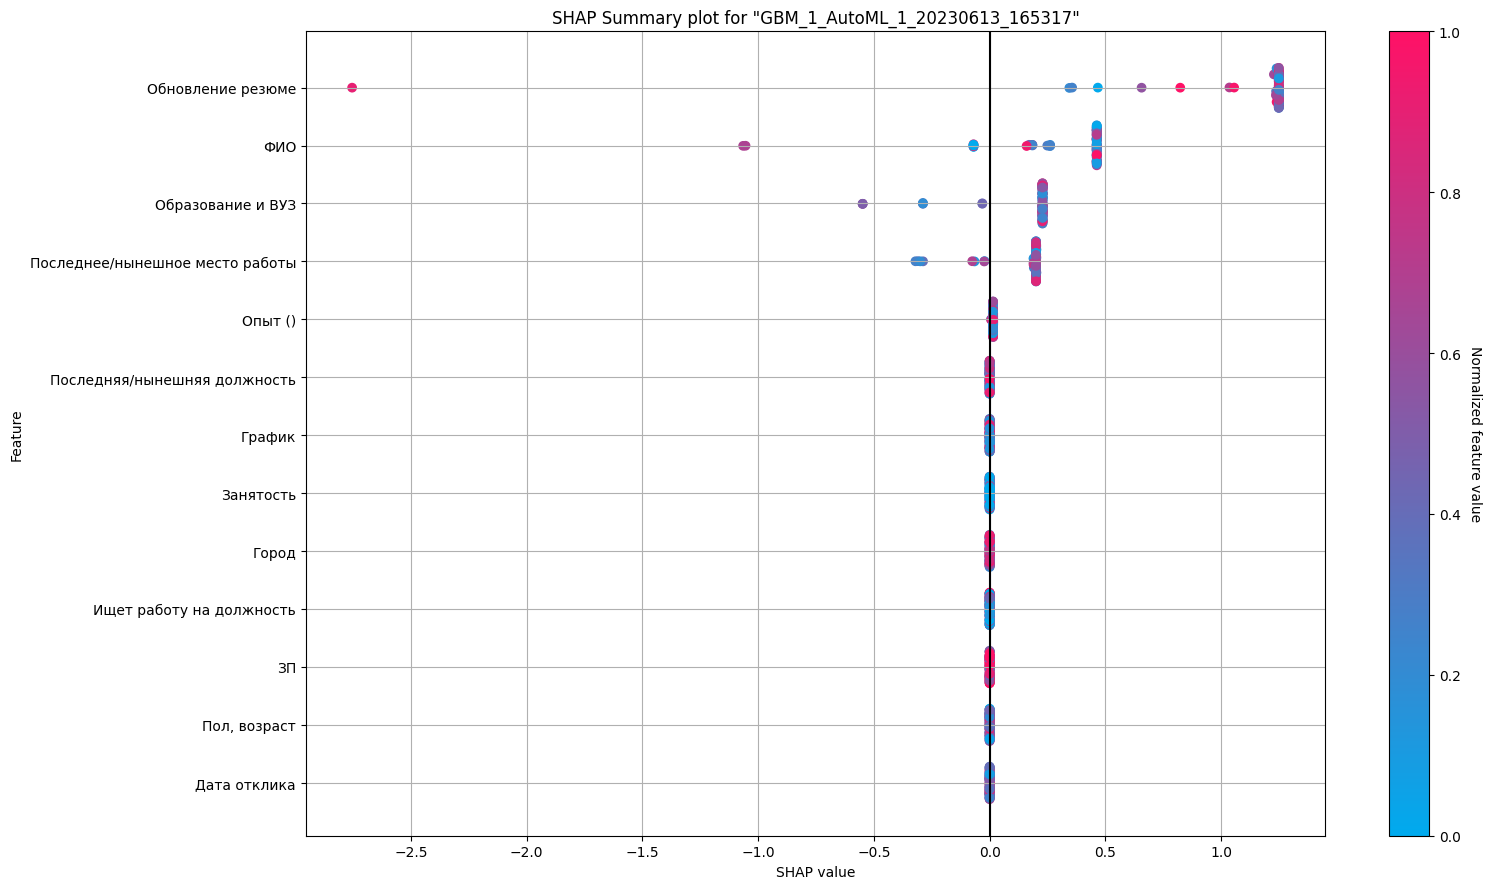

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

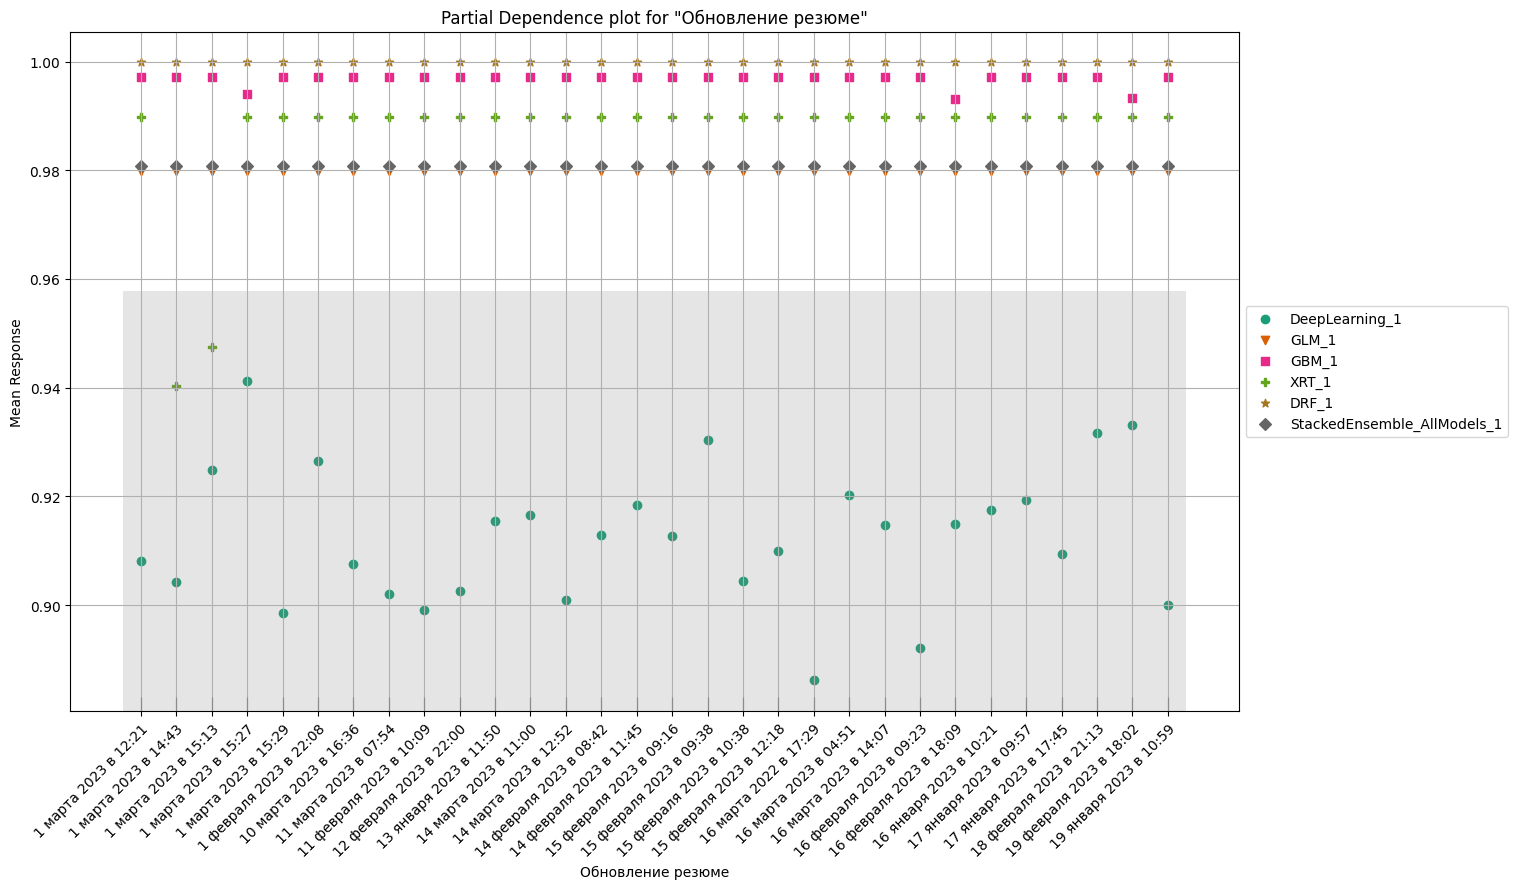

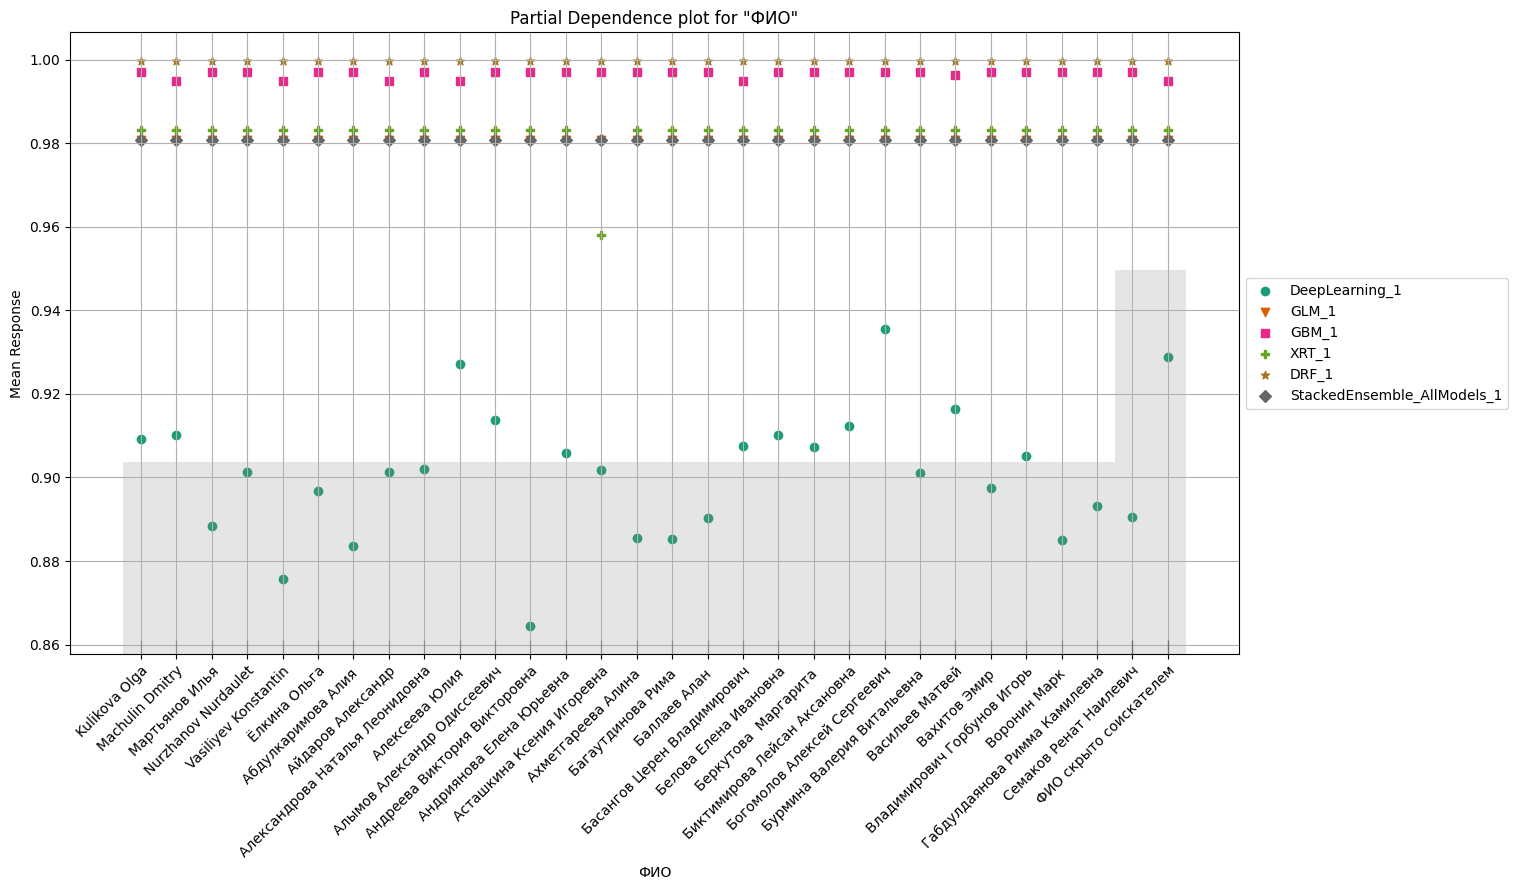

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:1618: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.8, 1])


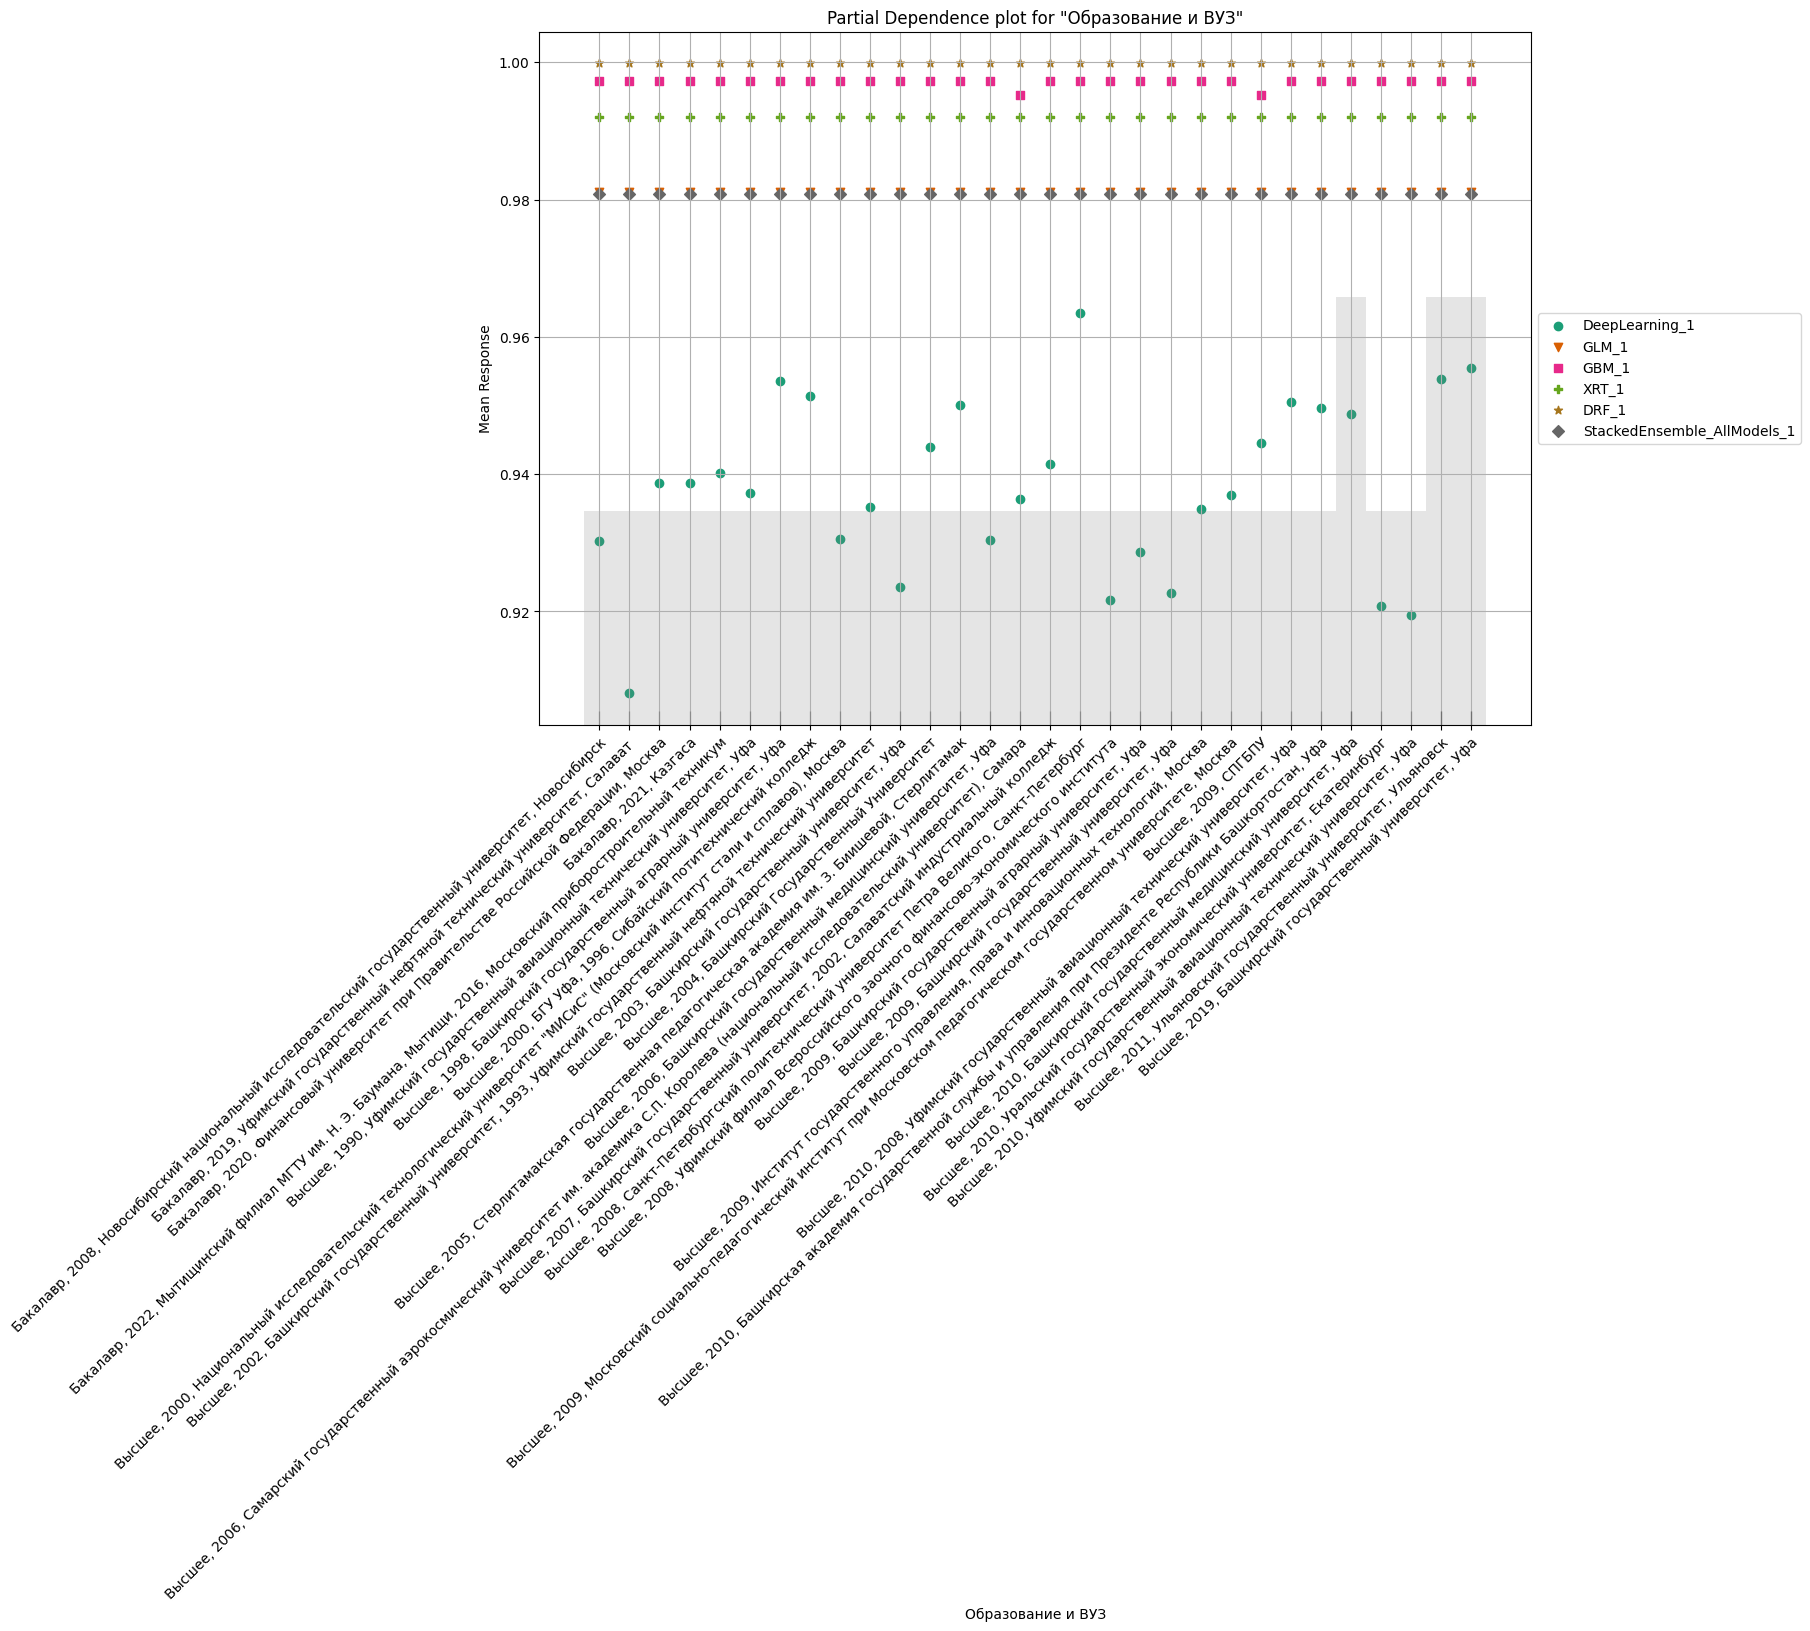

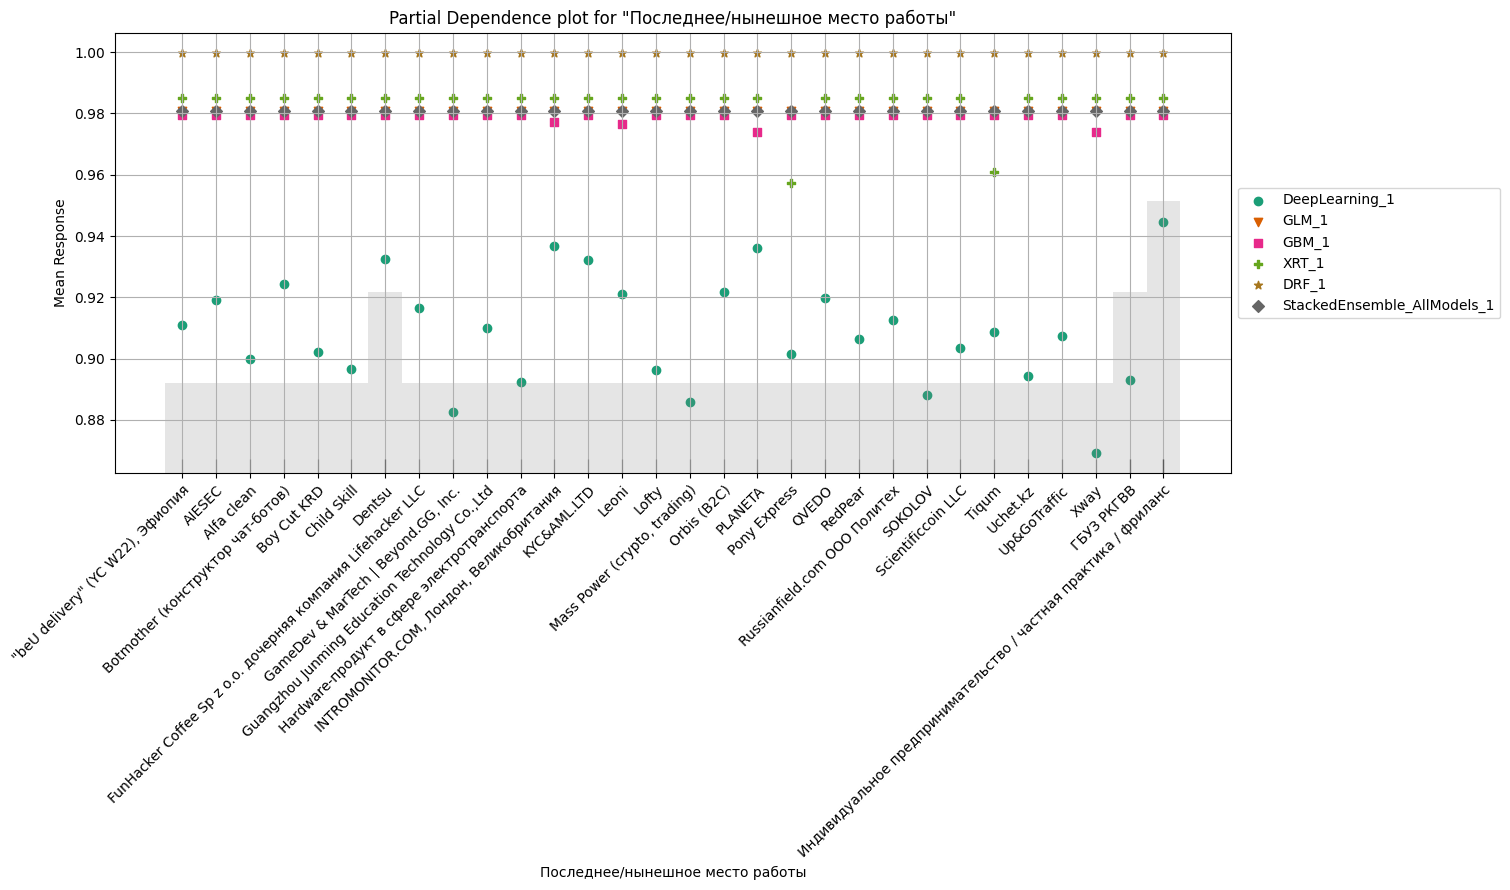

H2OServerError: ignored

<Figure size 1600x900 with 0 Axes>

In [12]:
type(aml_1)
aml_1.explain(test)

In [13]:
perf = aml_1.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.046663600004053174
RMSE: 0.21601759188559894
LogLoss: 0.21091789869884958
Mean Per-Class Error: 0.5
AUC: 0.4082397003745319
AUCPR: 0.9531030903269238
Gini: -0.18352059925093622

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5632486920786322
       да    нет    Error    Rate
-----  ----  -----  -------  ----------
да     0     3      1        (3.0/3.0)
нет    0     89     0        (0.0/89.0)
Total  0     92     0.0326   (3.0/92.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.563249     0.983425  91
max f2                       0.563249     0.993304  91
max f0point5                 0.563249     0.973742  91
max accuracy                 0.563249     0.967391  91
max precision                0.995858     1         0
max recall                   0.5

### Результат ответа

In [14]:
preds = aml_1.predict(test)
print(preds)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
predict            да       нет
нет        0.052677    0.947323
нет        0.0101576   0.989842
нет        0.1324      0.8676
нет        0.0525133   0.947487
нет        0.0220613   0.977939
нет        0.0371622   0.962838
нет        0.0433133   0.956687
нет        0.00787168  0.992128
нет        0.0579588   0.942041
нет        0.127245    0.872755
[109 rows x 3 columns]



### Предварительно обработаем

In [25]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data = convertDataSet(data)
data.to_csv('data.csv')
data.head(5)

,Response_date,Full_name,Gender,Salary,Job,City,Experience,Last_place,Position,Education,...,Employment_2,Employment_3,Employment_4,Employment_5,Employment_6,Schedule_0,Schedule_1,Schedule_2,Schedule_3,Schedule_4
0,1686677530,"[1, 1]",0,90000,"[4, 3, 2]","[1, 7, 6, 2, 5, 7, 6, 2, 4]",70,"[107, 108, 64, 28]","[4, 5, 32]","[3, 76, 1, 43, 2, 50, 71, 103, 6]",...,1,1,1,1,1,1,0,1,1,1
1,1686677530,"[1, 11, 50]",0,0,"[4, 3, 2]","[9, 6, 2, 5, 6, 2, 4]",143,"[4, 1]","[2, 10, 1, 1, 11, 1]","[3, 17, 1, 33, 16, 1, 1, 12, 6]",...,1,0,1,1,1,1,0,1,1,1
2,1686677530,"[1, 15, 39]",1,150000,"[4, 3, 2]","[11, 12, 3, 2, 5, 9, 3, 2, 4]",86,"[1, 35]","[7, 5, 47, 11, 52, 4]","[3, 27, 13, 41, 4, 2, 1, 146, 7, 118, 13, 26]",...,1,1,1,1,1,1,0,1,1,1
3,1686677530,"[1, 1, 1]",1,0,"[4, 3, 2]","[9, 13, 1, 14, 15, 3, 2, 4]",106,[109],"[2, 3, 60, 1]","[34, 43, 16, 4, 10, 2, 8, 36, 119, 120, 6, 30,...",...,1,1,1,0,1,1,0,1,1,1
4,1686677530,"[1, 40, 39]",1,150000,"[4, 3, 2]","[1, 14, 15, 3, 2, 4]",69,"[5, 9, 10, 11, 6]","[2, 15, 3]","[3, 24, 147, 15, 107, 108, 7, 35, 37, 22, 52, ...",...,1,1,1,1,1,1,0,1,1,1


In [26]:
df = h2o.import_file("data.csv")
df = df[:,1:]

df.describe ()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:579
Cols:28

,Response_date,Full_name,Gender,Salary,Job,City,Experience,Last_place,Position,Education,Update_resume,Suitable,Birth,Age,DegreeOfStudy,YearOfGraduation,Employment_0,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,Employment_6,Schedule_0,Schedule_1,Schedule_2,Schedule_3,Schedule_4
type,int,enum,int,int,enum,enum,int,enum,enum,enum,int,enum,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1686677530.0,,0.0,0.0,,,0.0,,,,1686677530.0,,1686677530.0,0.0,,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mean,1686677530.837651,,0.5215889464594128,43324.35578583765,,,119.17789291882556,,,,1686677530.837651,,1686677530.837651,28.454231433506045,,1955.245250431779,0.7132987910189983,1.0,1.0,0.3229706390328152,0.9671848013816926,0.9965457685664939,1.0,0.9723661485319517,0.542314335060449,0.9965457685664939,0.49568221070811747,0.9930915371329879
maxs,1686677532.0,,1.0,350000.0,,,446.0,,,,1686677532.0,,1686677532.0,60.0,,2026.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,0.6944406037016471,,0.49996563579013453,59109.15557008777,,,83.22247539027784,,,,0.6944406037016471,,0.6944406037016471,13.453594285246623,,340.4263893991987,0.45261179641181576,0.0,0.0,0.46801593017882204,0.1783066796778441,0.05872184648455243,0.0,0.16406312807564064,0.4986370676594125,0.05872184648455243,0.5004136792618045,0.08290118089211924
zeros,0,,277,288,,,7,,,,0,,0,76,,17,166,0,0,392,19,2,0,16,265,2,292,4
missing,0,0,0,0,0,0,0,0,0,0,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1686677530.0,"[1, 1]",0.0,90000.0,"[4, 3, 2]","[1, 7, 6, 2, 5, 7, 6, 2, 4]",70.0,"[107, 108, 64, 28]","[4, 5, 32]","[3, 76, 1, 43, 2, 50, 71, 103, 6]",1686677530.0,да,1686677530.0,0.0,[2],2023.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1686677530.0,"[1, 11, 50]",0.0,0.0,"[4, 3, 2]","[9, 6, 2, 5, 6, 2, 4]",143.0,"[4, 1]","[2, 10, 1, 1, 11, 1]","[3, 17, 1, 33, 16, 1, 1, 12, 6]",1686677530.0,да,1686677530.0,0.0,[2],2022.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1686677530.0,"[1, 15, 39]",1.0,150000.0,"[4, 3, 2]","[11, 12, 3, 2, 5, 9, 3, 2, 4]",86.0,"[1, 35]","[7, 5, 47, 11, 52, 4]","[3, 27, 13, 41, 4, 2, 1, 146, 7, 118, 13, 26]",1686677530.0,да,1686677530.0,33.0,[2],2013.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [27]:
train, test, valid = df.split_frame ( ratios = [ .7 , .15 ])

y = "Suitable"
x_train= train.columns
x_train.remove(y)


In [28]:
aml_2 = H2OAutoML(max_models = 10, seed = 1)
aml_2.train(x = x_train, y = y, training_frame = train)

AutoML progress: |
17:32:16.808: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]
17:32:16.845: XGBoost_1_AutoML_2_20230613_173216 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_2_20230613_173216_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

17:32:16.848: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]

█████
17:32:22.302: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]
17:32:23.523: GBM_1_AutoML_2_20230613_173216 [GBM def_5] failed: java.lang.ArrayIndexOutOfBoundsException: Index 78 out of bounds for length 63
17:32:23.542: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]
17:32:23.568: XGBoost_2_AutoML_2_20230613_173216 [XGBoost def_1] failed: water.excep

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_2_20230613_173216_model_2


Status of Neuron Layers: predicting Suitable, 2-class classification, bernoulli distribution, CrossEntropy loss, 74,952 weights/biases, 934.3 KB, 27,272 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate            rate_rms             momentum    mean_weight            weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  -------------------  -------------------  ----------  ---------------------  -------------------  ----------------------  -------------------
    1        1445     Input             20.0
    2        50       RectifierDropout  40.0       0.0   0.0   0.7872833606792939   0.35475099086761475  0.0         0.0006187695860658583  0.03901952505111694  0.48922243291492606     0.3903045654296875
    3        50       RectifierDropout  40.0       0.0   0.0   0.39392675611004235  0.3973904848098755   0.0         0.0009819520099277725  0.15518641471862793  1.009487432910966       0.20210671424865723
    4        2        Softmax                      0.0   0.0   0.07501208854839206  0.18455654382705688  0.0         0.025486791785806418   0.8454334735870361   -0.0004256956553040925  0.5481760501861572

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.010005947395981167
RMSE: 0.10002973255978029
LogLoss: 0.032776361458768916
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16873788221688674
       да    нет    Error    Rate
-----  ----  -----  -------  -----------
да     7     0      0        (0.0/7.0)
нет    0     325    0        (0.0/325.0)
Total  7     325    0        (0.0/332.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.168738     1         230
max f2                       0.168738     1         230
max f0point5                 0.168738     1         230
max accuracy                 0.168738     1         230
max precision                1            1         0
max recall                   0.168738     1         230
max specificity              1            1         0
max absolute_mcc             0.168738     1         230
max min_per_class_accuracy   0.168738     1         230
max mean_per_class_accuracy  0.168738     1         230
max tns                      1            7         0
max fns                      1            284       0
max fps                      2.71436e-09  7         237
max tps                      0.168738     325       230
max tnr                      1            1         0
max fnr                      1            0.873846  0
max fpr                      2.71436e-09  1         237
max tpr                      0.168738     1         230

Gains/Lift Table: Avg response rate: 97.89 %, avg score: 95.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.00903614                  1                  1.02154   1.02154            1                1         1                           1                   0.00923077      0.00923077                 2.15385   2.15385            0.00923077
2        0.0120482                   1                  1.02154   1.02154            1                1         1                           1               

In [29]:
best_model_2 = aml_2.leader
lb = aml_2.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_2_AutoML_2_20230613_173216_model_2,0.865055,0.0883818,0.996587,0.5,0.140952,0.0198676
DeepLearning_grid_3_AutoML_2_20230613_173216_model_1,0.856703,0.0929171,0.996456,0.5,0.148883,0.0221662
DeepLearning_grid_1_AutoML_2_20230613_173216_model_1,0.837363,0.105014,0.995704,0.358681,0.138957,0.019309
DeepLearning_grid_2_AutoML_2_20230613_173216_model_1,0.826374,0.0790477,0.995446,0.285714,0.123884,0.0153473
StackedEnsemble_AllModels_1_AutoML_2_20230613_173216,0.825495,0.0798457,0.995392,0.357143,0.130973,0.0171539
StackedEnsemble_BestOfFamily_1_AutoML_2_20230613_173216,0.814505,0.0882522,0.995054,0.5,0.140614,0.0197723
DeepLearning_grid_1_AutoML_2_20230613_173216_model_2,0.805275,0.0930343,0.994205,0.5,0.138599,0.0192097
DeepLearning_1_AutoML_2_20230613_173216,0.789451,0.0781715,0.992362,0.287253,0.126787,0.0160749
GLM_1_AutoML_2_20230613_173216,0.643736,0.0903104,0.988022,0.428571,0.138727,0.0192453
DRF_1_AutoML_2_20230613_173216,0.591209,0.157173,0.984651,0.5,0.147127,0.0216465


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_2_AutoML_2_20230613_173216_model_2

,да,нет,Error,Rate
да,1.0,1.0,0.5,(1.0/2.0)
нет,0.0,95.0,0.0,(0.0/95.0)
Total,1.0,96.0,0.0103,(1.0/97.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

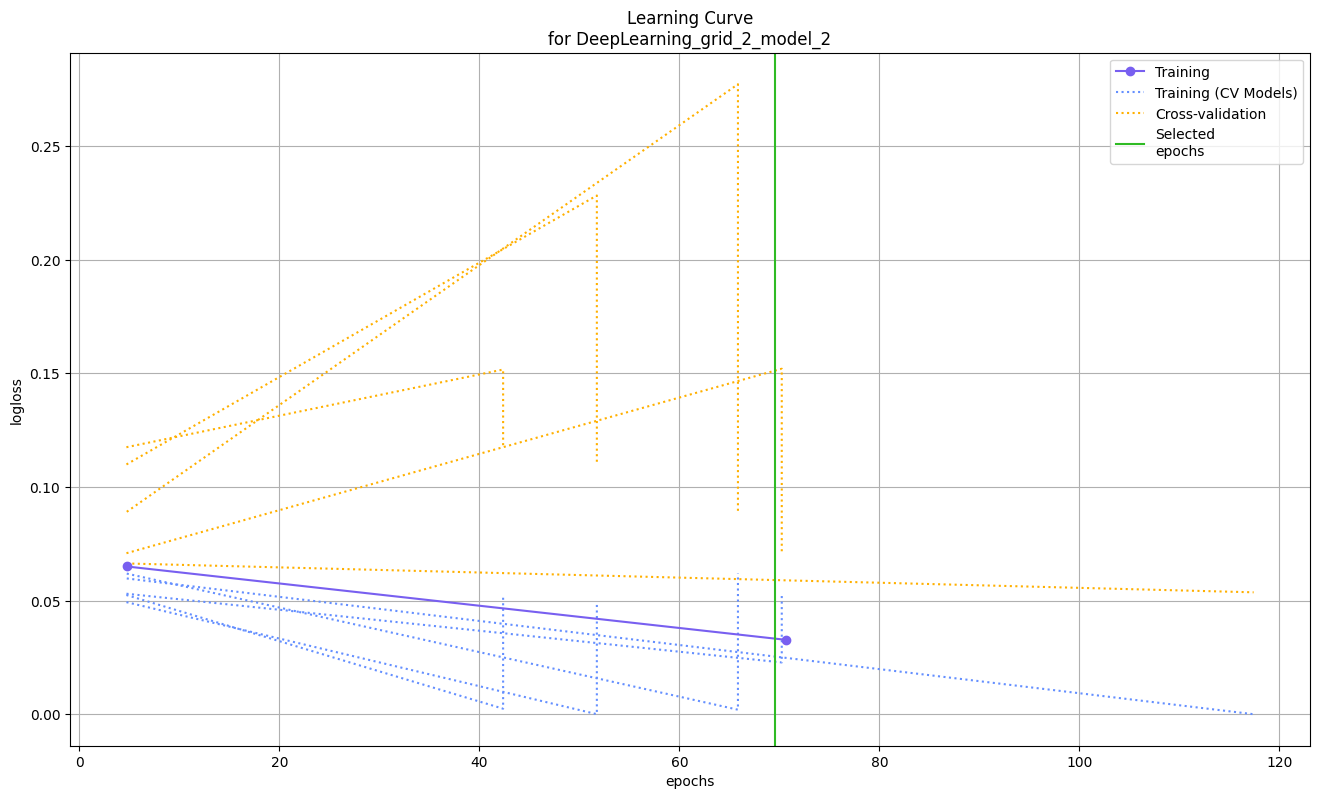

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

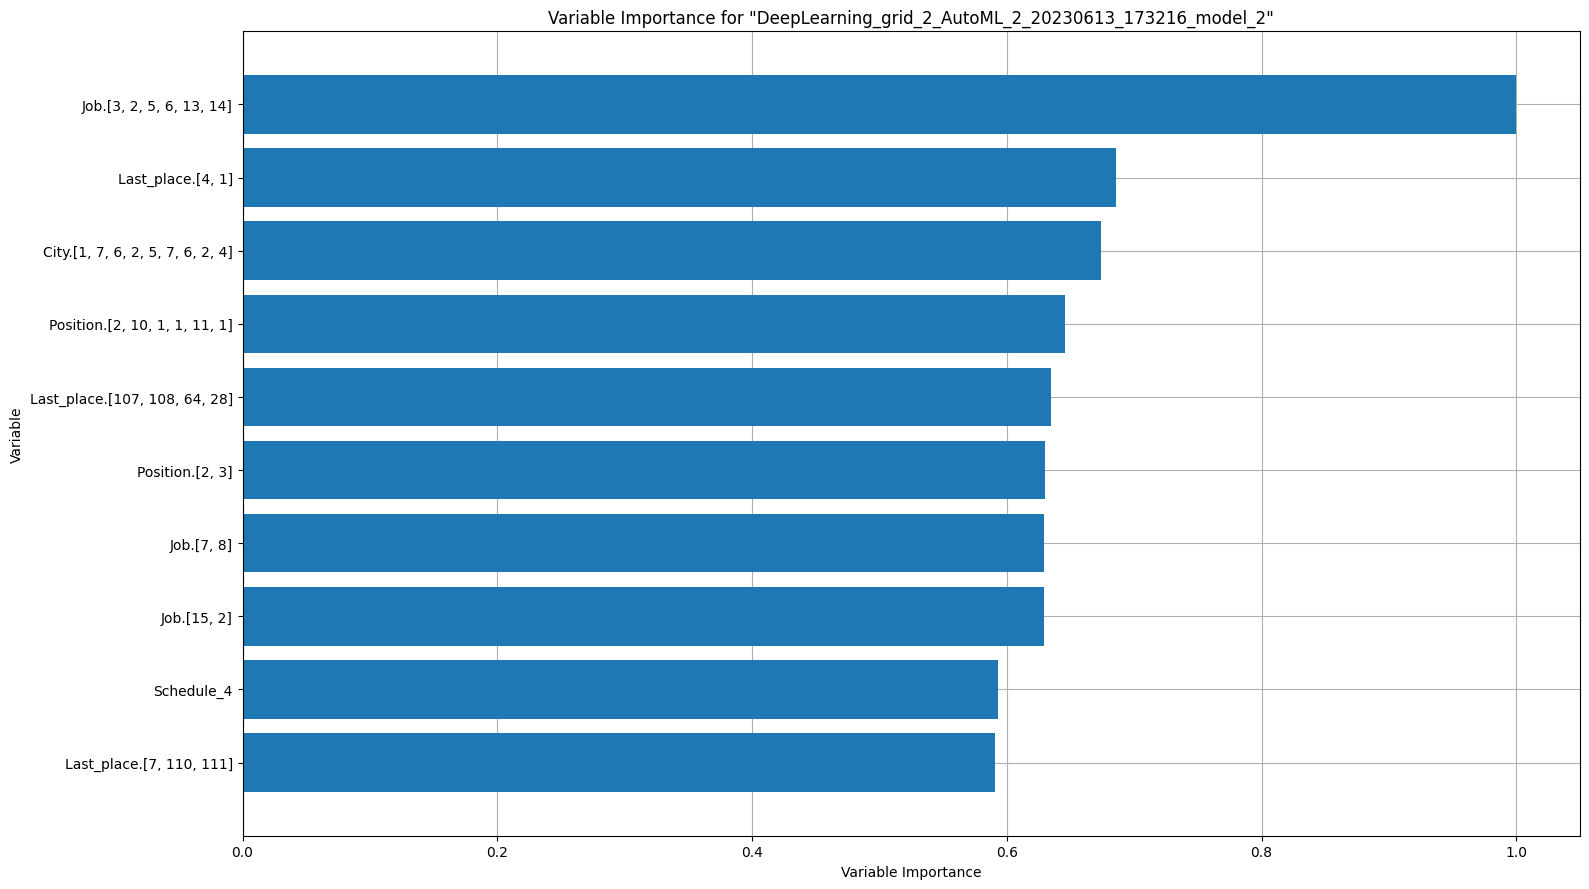

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

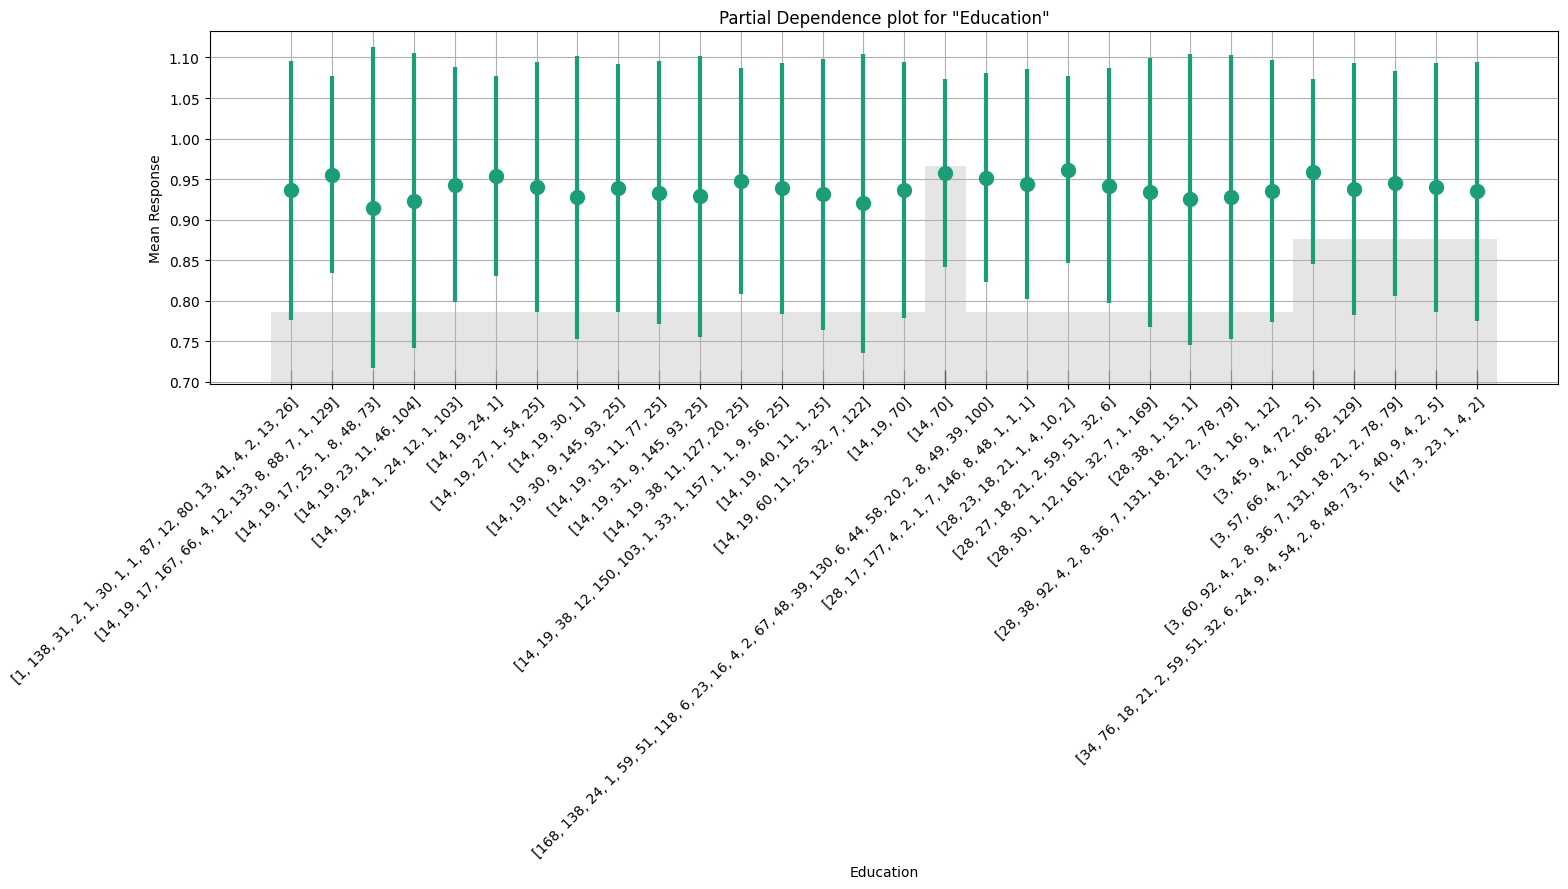

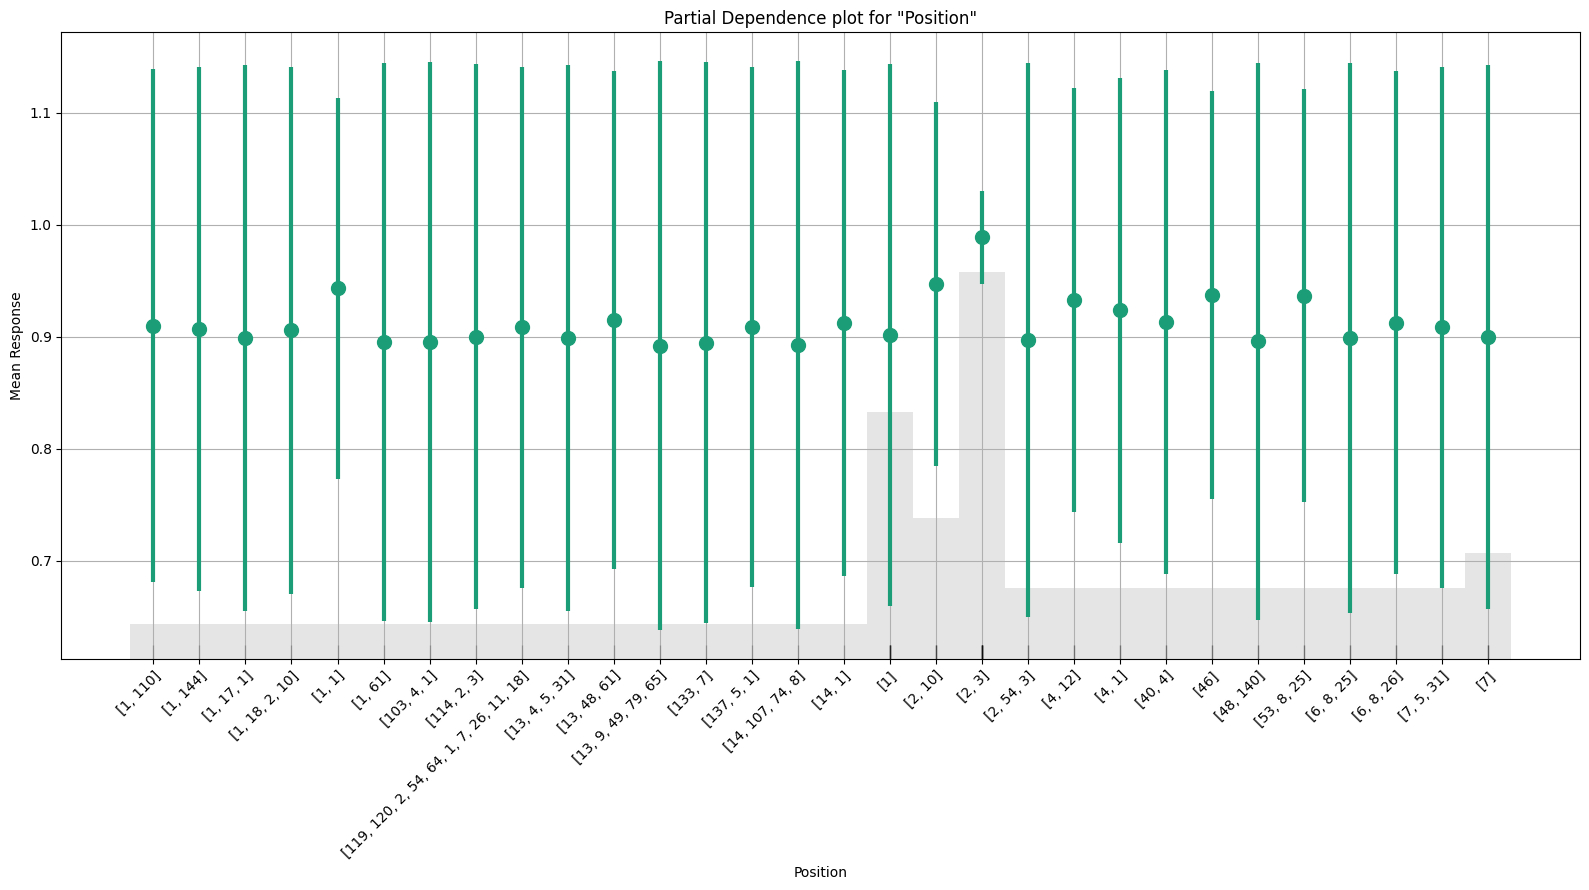

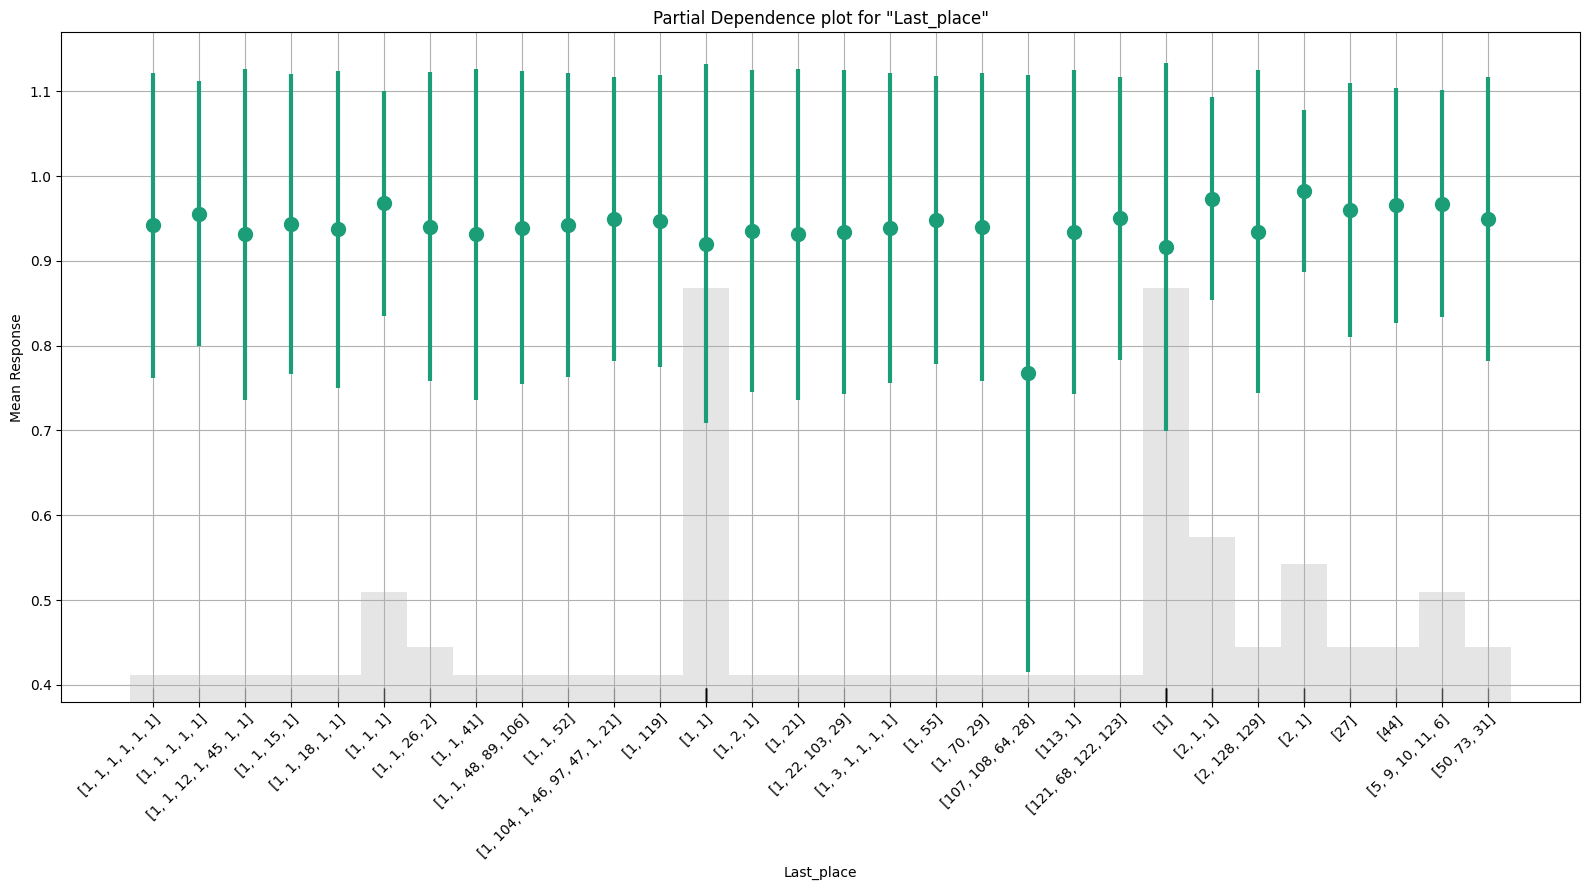

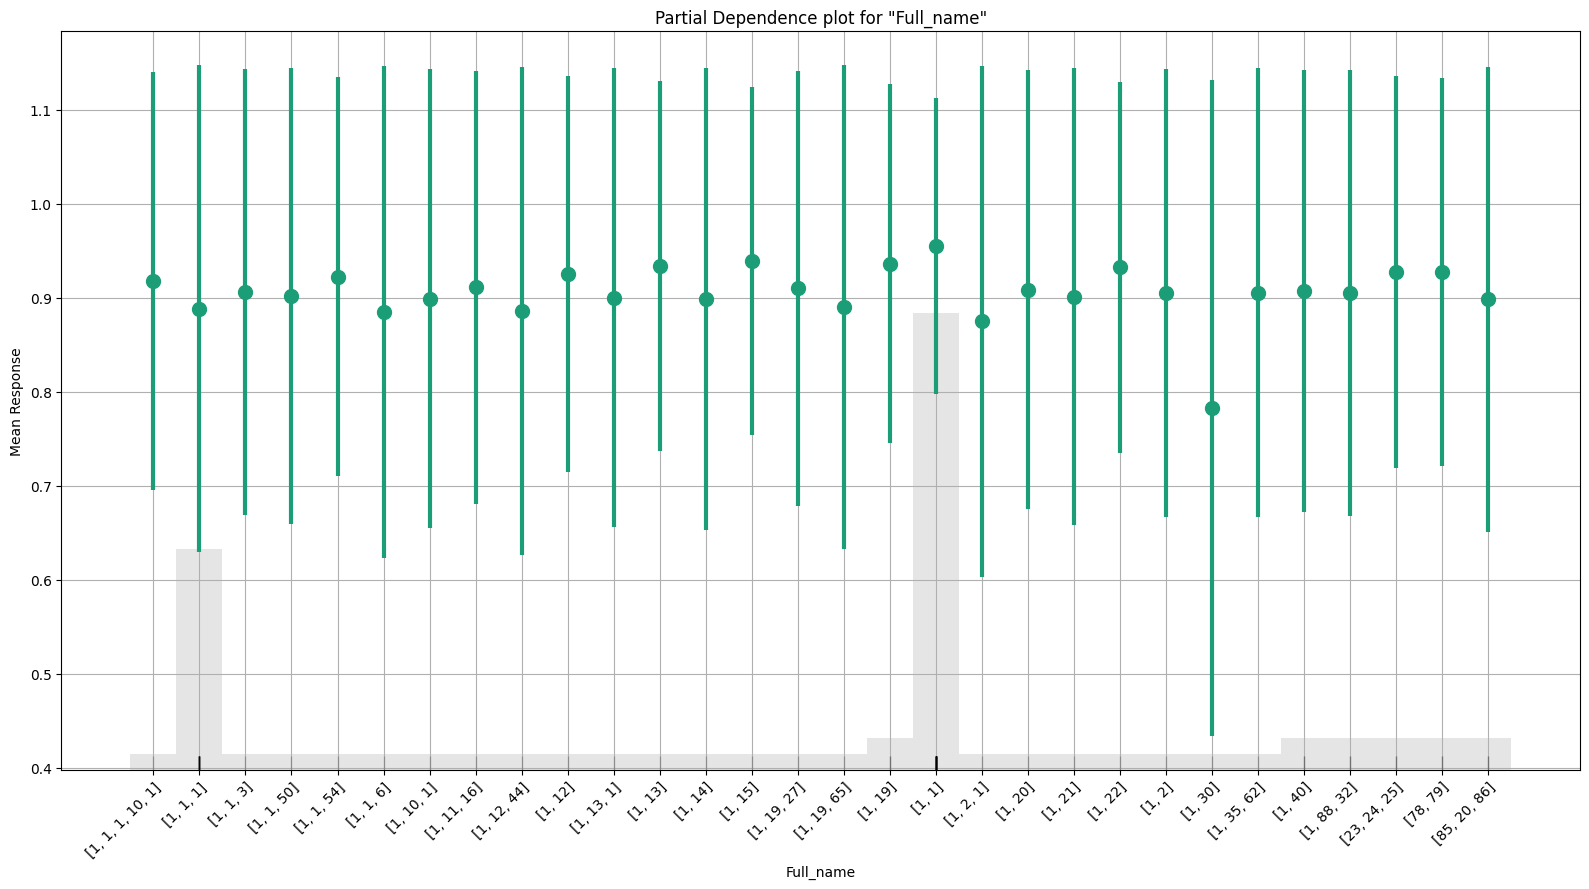

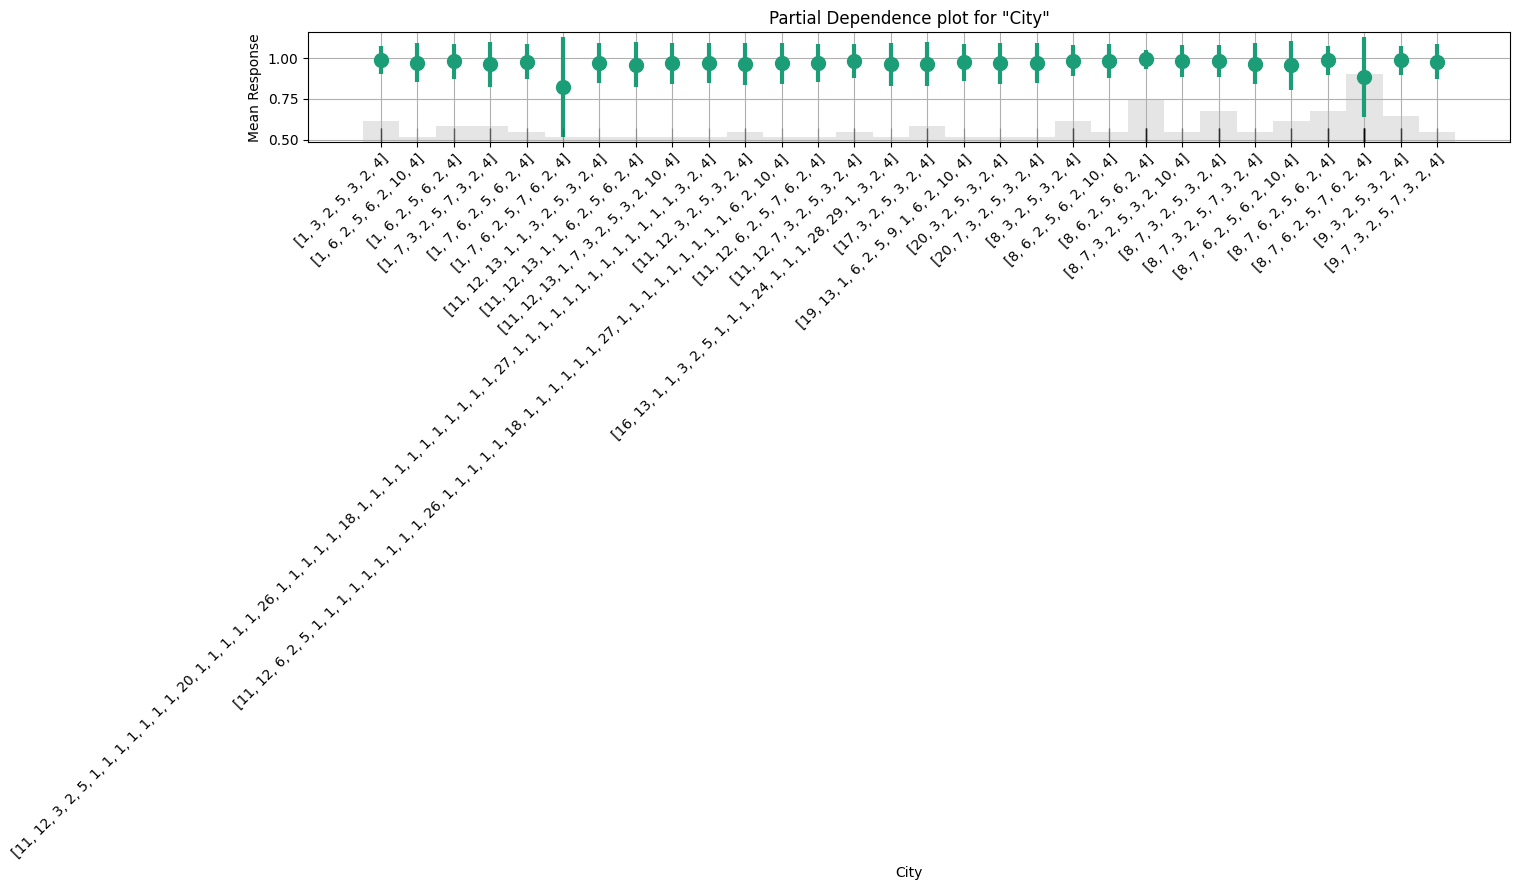

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_2_AutoML_2_20230613_173216_model_2

,да,нет,Error,Rate
да,1.0,1.0,0.5,(1.0/2.0)
нет,0.0,95.0,0.0,(0.0/95.0)
Total,1.0,96.0,0.0103,(1.0/97.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [30]:
best_model_2.explain(test)

In [31]:
perf = aml_2.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.03861053791599659
RMSE: 0.1964956435038614
LogLoss: 0.11897958542840371
Mean Per-Class Error: 0.25
AUC: 0.9368421052631579
AUCPR: 0.9985944063934261
Gini: 0.8736842105263158

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0620398571373504
       да    нет    Error    Rate
-----  ----  -----  -------  ----------
да     1     1      0.5      (1.0/2.0)
нет    0     95     0        (0.0/95.0)
Total  1     96     0.0103   (1.0/97.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0620399    0.994764  79
max f2                       0.0620399    0.997899  79
max f0point5                 0.0620399    0.991649  79
max accuracy                 0.0620399    0.989691  79
max precision                1            1         0
max recall                   0.0620

### Результат ответа

In [42]:
preds = aml_2.predict(test)
print(preds)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
predict             да          нет
да         0.99918      0.000820378
нет        7.9045e-06   0.999992
нет        0.000128748  0.999871
нет        0.000107039  0.999893
нет        9.00365e-05  0.99991
нет        7.5459e-05   0.999925
нет        1.3829e-06   0.999999
нет        0.00638058   0.993619
нет        0.00368817   0.996312
нет        0.434596     0.565404
[108 rows x 3 columns]



In [70]:
h2o.model.models.regression.h2o_mean_absolute_error(test["Suitable"].apply(lambda x: x=='да', axis=0),preds["predict"].apply(lambda x: x=='да', axis=0))

0.018518518518518517

## **Autokeras**

In [17]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
#Если необходимо переименовать
data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']

#Suitable
#Список ответов делаем
listAnswers = []
#Обработаем отдельно колонку с ответами
for i, row in data.iterrows():
   a = 1 if str(row.Suitable).find('да') != -1 else 0
   listAnswers.append([a])
answers = np.array(listAnswers)
print(answers.shape)

(579, 1)


In [ ]:
dataset = takeDataSet(data)
print(dataset.shape)
# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Делаем выборки для обучения
x_train, x_test, y_train, y_test = train_test_split(dataset, # набор параметров
                                                    answers, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость
print(x_train.shape)

In [19]:
model = ak.StructuredDataClassifier(overwrite=True,
                                 max_trials=10)
# Обучение сети
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test),)

Trial 10 Complete [00h 00m 42s]
val_accuracy: 0.9913793206214905

Best val_accuracy So Far: 0.9913793206214905
Total elapsed time: 00h 07m 02s
Epoch 1/10
15/15 [==============================] - 7s 130ms/step - loss: 0.4486 - accuracy: 0.9050 - val_loss: 0.2683 - val_accuracy: 0.9914
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 0.1955 - accuracy: 0.9762 - val_loss: 0.1325 - val_accuracy: 0.9914
Epoch 3/10
15/15 [==============================] - 0s 15ms/step - loss: 0.1171 - accuracy: 0.9784 - val_loss: 0.0863 - val_accuracy: 0.9914
Epoch 4/10
15/15 [==============================] - 0s 16ms/step - loss: 0.0924 - accuracy: 0.9784 - val_loss: 0.0719 - val_accuracy: 0.9914
Epoch 5/10
15/15 [==============================] - 0s 16ms/step - loss: 0.0814 - accuracy: 0.9784 - val_loss: 0.0679 - val_accuracy: 0.9914
Epoch 6/10
15/15 [==============================] - 0s 16ms/step - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0668 - val_accuracy: 0.9914
Epoch 7/10

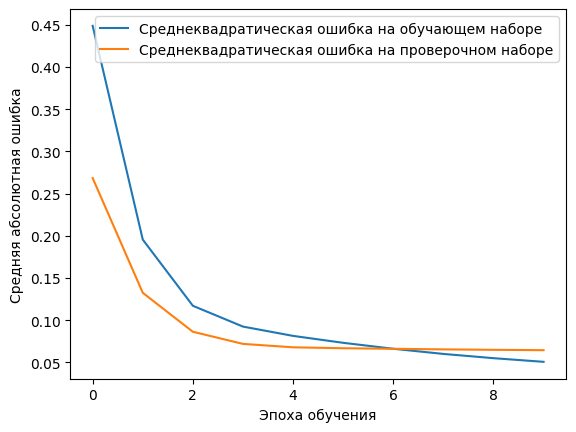

In [20]:

# Визуализация точности на обучающей выборке
plt.plot(history.history['loss'],
         label='Среднеквадратическая ошибка на обучающем наборе') #mae accuracy
plt.plot(history.history['val_loss'],
        label='Среднеквадратическая ошибка на проверочном наборе') #val_mae val_accuracy
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [21]:
eval = model.evaluate(x_test, y_test)
print(eval)

4/4 [==============================] - 2s 11ms/step - loss: 0.0645 - accuracy: 0.9914
[0.06449197232723236, 0.9913793206214905]


In [22]:

# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_train)

# Расчет среднего значения ошибки
print(mean_absolute_error(pred, y_train))

15/15 [==============================] - 0s 12ms/step
0.019438444924406047
